In [2]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading csv file in the form of dataframe.
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [7]:
# Displaying basic information of the dataframe.
print("No. of samples :",stroke.shape[0])
print("No. of features :",stroke.shape[1])
print("List of features :",stroke.columns.tolist())

No. of samples : 5110
No. of features : 12
List of features : ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [9]:
# Displaying random 5 samples of the dataframe.
stroke.sample(n=5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3511,62983,Female,26.0,0,0,Yes,Private,Urban,138.02,20.3,smokes,0
535,56998,Female,12.0,0,0,No,children,Urban,138.06,23.1,Unknown,0
4463,57870,Male,54.0,0,0,Yes,Private,Rural,89.41,42.4,smokes,0
832,49521,Female,33.0,0,0,Yes,Private,Urban,121.04,31.4,Unknown,0
3276,44986,Female,79.0,0,0,Yes,Self-employed,Urban,78.32,32.0,Unknown,0


    1.We have the records of 5110 patients in our data.
    2.The data has 11 predictors/independent variables that will be used to predict the dependent variable;ie stroke

In [10]:
# More information about the features.
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


    1.All columns are in the right format for data analysis.
    2.We have missing values in the bmi column. We need to analyze the data first, in order to understand how to deal with the missing values.

In [11]:
# statistical summary of the numerical features.
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
# A function to convert the stroke feature from integer to categorical.
def int_to_cat(val):
    if val == 1:
        return 'Stroke'
    else:
        return 'No Stroke'

# applying the given function to the dataframe.
stroke['class'] = stroke['stroke'].apply(int_to_cat)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Stroke


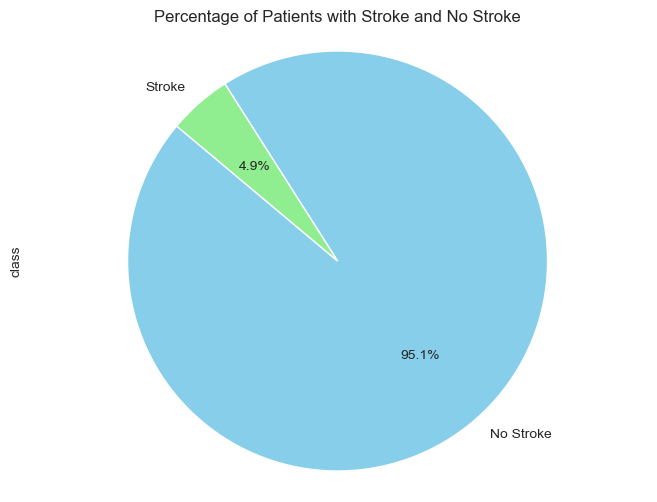

In [23]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
stroke['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Patients with Stroke and No Stroke')
plt.axis('equal')  
plt.show()


    The given data is highly imbalanced and biased.